Para este ejercicio usaremos la funcion inversa.
Generalmente damos una V.A. uniforme entre [0,1], la ponemos en la distribucion de Poisson para encontrar el numero de eventos N, 
Pero este puede ser muy dificil de hacer, por lo cual usamos el intervalo de tiempo entre eventos exitosos a cambio, estos tienen
una distribucion exponencial, lo cual lo hace mas facil resolver el problema, con la inversa de la funcion de distribucion de 
Poisson (PDF) y una V.A. uniforme entre [0,1] obtenemos el numero de eventos en un intervalo dado. 

In [1]:
from random import random 
import math
import numpy as np
import matplotlib.pyplot as plt

La distribucion entre los eventos en el intervalo es de forma exponencial: X = exp(_lambda)
Donde _lambda es el promedio de la distribucion.
La funcion de distribucion de Poisson es: 
    
    P(t) = (_lambda) * exp -(_lambda*t) 

Como quiero averiguar la probabilidad en un intervalo, debo usar la acumulada, que es la integral entre 0 y t. Lo cual es:
    
    C(t) = 1 - exp -(_lambda*t)

que nos va a dar un numero z, entre 0 y 1.
Obtengo la inversa en funcion de z:
    
    F(z) = - ln(1 - z)/_lambda
    
Nos va a dar el tiempo entre cada evento, empezando en cero y sumando el tiempo de cada evento  encontrado con la expresion de arriba hasta llegar a T, tenemos el numero de eventos exitosos en el intervalo [0,T]
    
Evaluando un suficiente numeros de veces (varios valores de z) obtendremos  el numero de exitos N en el intervalo.


In [118]:
    mu = 5
#     promedio temporal del intervalo, predefinido: 5
    tiradas = 100
#     Numero de sorteos dentro del intervalo,  un numero suficientemente grande para llegar a cubrirlo
    to = 0
#     Tiempo de inicio del intervalo, predefinido: 0
    _inter = 3
#     Intervalo de tiempo, predfinido: 3
    repeticiones = 10000
#     El numero de veces que vamos a ejecutar la funcion
    lista_n = []
#     Quiero agregar en un lista el numero de cada evento exitoso en el intervalo

    for p in range(repeticiones):
        n = 0
        to = 0
#         Quiero que por cada repeticion, los valores de n y t arranque en cero
        for i in range(tiradas):
#         Obtengo el valor de probabilidad de Uniform (0,1)
            z = random()
#         Lo uso en la funcion inversa, y saco el tiempo de intervalo entre llegadas   
            k = -math.log(1 - z)/ mu
#     Le sumo el tiempo entre llegadas a la suma corriente
            to = to + k
            n = n + 1
#         n me da los tiempos de los eventos   
            if to > _inter:
             break
#             Cuando superamos el intervalo, para con el sorteo
        lista_n.append(n)

In [119]:
len(lista_n)
# Veo si las cantidad de repeticiones coincide con el len de la lista

10000

Text(0, 0.5, 'Conteos')

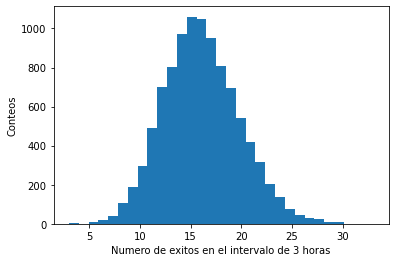

In [121]:
plt.hist(lista_n, bins = 31)
# Hacemos el histograma, los bins depende de cada funcion, muchos bins puede suponer perdida de informacion y hay huecos, mientras
# que pocos bins el histograma sale mal
plt.xlabel ('Numero de exitos en el intervalo de 3 horas')
plt.ylabel ('Conteos')

Vemos que el maximo de repeticiones ocurre para las 14,15,16 exitos en el intervalo de 3 horas